# Cel pracy

Za pomocą metody shortest_path z biblioteki NetworkX celem pracy jest odnalezienie najkrótszej czasowo ścieżki pomiędzy domem, a pracą.

# Opis

Zagadnienie najszybszej czyli najkrótszej czasowo ścieżki można wyznaczyć za pomocą grafów skierowanych, niekierowanych czy mieszanych. Polega ono na wybraniu ścieżki między węzłami w grafie tak, aby suma ich wag składowych na krawędziach była najmniejsza z możliwych.

Przykładowe możności na wyznaczenie najkrótszej ścieżki:


* Algorytm Bellmana-Forda – algorytm służący do wyszukiwania najkrótszych ścieżek w grafie ważonym z wierzchołka źródłowego do wszystkich pozostałych wierzchołków. Idea algorytmu opiera się na metodzie relaksacji (dokładniej następuje relaksacja $|V|-1$ razy każdej z krawędzi). W odróżnieniu od algorytmu Dijkstry, algorytm Bellmana-Forda działa poprawnie także dla grafów z wagami ujemnymi (nie może jednak wystąpić cykl o łącznej ujemnej wadze osiągalny ze źródła). Za tę ogólność płaci się jednak wyższą złożonością czasową. Działa on w czasie $O(|V| \cdot |E|)$. Na algorytmie Bellmana-Forda bazuje protokół RIP - Routing Information Protocol.


* Algorytm Dijkstry - został opracowany przez holenderskiego informatyka Edsgera Dijkstrę, służy do znajdowania najkrótszej ścieżki z pojedynczego źródła w grafie o nieujemnych wagach krawędzi. Mając dany graf z wyróżnionym wierzchołkiem (źródłem) algorytm znajduje odległości od źródła do wszystkich pozostałych wierzchołków. Łatwo zmodyfikować go tak, aby szukał wyłącznie (najkrótszej) ścieżki do jednego ustalonego wierzchołka, po prostu przerywając działanie w momencie dojścia do wierzchołka docelowego, bądź transponując tablicę incydencji grafu.

## Problem do rozwiązania

Podróżując pomiędzy domem a pracą bywa tak, że musimy jechać przez miasto. Bywa to uciążliwe ze wzglądu na korki. Niestety w tym wypadku trasa, która jest najkrótsza pod względem odległości nie będzie najkrótsza pod względem czasu. Jako, że żyjemy w szybkich czasach priorytetem będzie w tej pracy czas.

Ze względu na losowe położenie punktów w grafie oraz chęć zachowania prywatności dla punktu startowego przyjmę obrzeża miasta, które będą symbolizować dom. Natomiast dla punktu końcowego centrum, który będzie pracą. Jeżeli chodzi o punkty pomiędzy będą one przykładowymi skrzyżowaniami. 


Punkty grafu:
* A - punkt startowy Marynin 176, 21-030 Marynin
* B-T - punkty będące skrzyżowaniami  
* Z - punkt końcowy Krakowskie Przedmieście 2, 20-400 Lublin 

Droga wyznaczona przez google maps. Jak widzimy sugerowana trasa jest najdłuższa drogą.
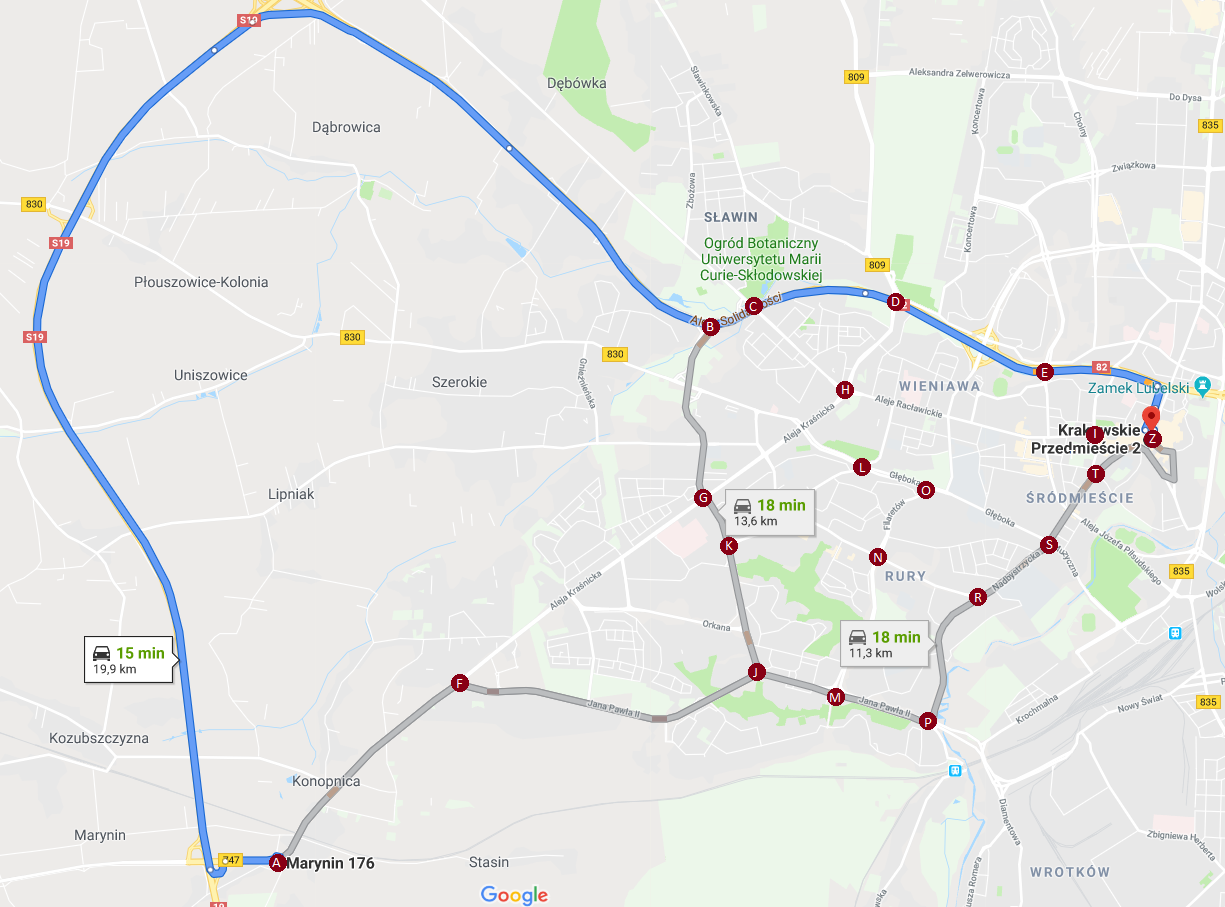

# Realizacja

Aby rozwiązać problem użyję metody shortest_path, która jest w  bibliotece NetworkX. Zadaniem tej metody jest obliczenie najkrótszej ścieżki pomiędzy podanymi węzłami, jako parametr podajemy węzeł początkowy, węzeł końcowy oraz parametr wskazujący, by metoda ta uwzględniała wagi. Można również wybrać czy ma być uzyty algorytm ellmana - Forda czy Dijkstry. Wynikiem uzyskanym dzięki tej metodzie jest najkrótsza możliwa trasa.

In [1]:
# importuję biblioteki oraz przypisuje im aliasy

import networkx as nx
import matplotlib.pyplot as plt

# # przygotowywanie pustego grafu
G = nx.Graph()

Następnym krokiem jest ustawienie krawędzi między punktami oraz ich wartości oznaczającej czas podany w sekundach na podstawie danych z google maps o godzinie 7:30.

In [2]:
G.add_edge('a','b', weight=600)
G.add_edge('a','f', weight=300)

G.add_edge('b','c', weight=30)
G.add_edge('b','g', weight=240)
G.add_edge('b','l', weight=360)

G.add_edge('c','d', weight=120)
G.add_edge('c','h', weight=180)

G.add_edge('d','e', weight=180)
G.add_edge('d','h', weight=180)

G.add_edge('e','i', weight=240)
G.add_edge('e','z', weight=300)

G.add_edge('f','g', weight=360)
G.add_edge('f','j', weight=300)
G.add_edge('f','k', weight=420)

G.add_edge('g','h', weight=240)
G.add_edge('g','k', weight=30)
G.add_edge('g','l', weight=240)
G.add_edge('g','n', weight=360)

G.add_edge('h','i', weight=540)
G.add_edge('h','t', weight=660)

G.add_edge('i','l', weight=450)
G.add_edge('i','o', weight=420)
G.add_edge('i','t', weight=100)
G.add_edge('i','z', weight=200)

G.add_edge('j','m', weight=120)
G.add_edge('j','k', weight=180)

G.add_edge('k','l', weight=240)
G.add_edge('k','n', weight=300)

G.add_edge('l','o', weight=120)

G.add_edge('m','n', weight=180)
G.add_edge('m','p', weight=120)

G.add_edge('n','o', weight=180)
G.add_edge('n','r', weight=120)

G.add_edge('o','s', weight=240)
G.add_edge('o','t', weight=360)

G.add_edge('p','r', weight=180)

G.add_edge('r','s', weight=240)

G.add_edge('s','t', weight=120)

G.add_edge('t','z', weight=240)

# ustawiam współrzędne punktów
positions = dict(a=(0, 0), b=(440, 560), c=(485, 580), d=(630, 585), e=(775, 515), f=(190, 200), g=(435, 390), h=(575, 500),
                 i=(825, 450), j=(490, 215), k=(460, 340), l=(595, 420), m=(570, 190), n=(610, 330), o=(660, 400), p=(660, 165),
                 r=(710, 290), s=(780, 340), t=(830, 410), z=(885, 450))

Uzyskany graf prezentuję poniżej.

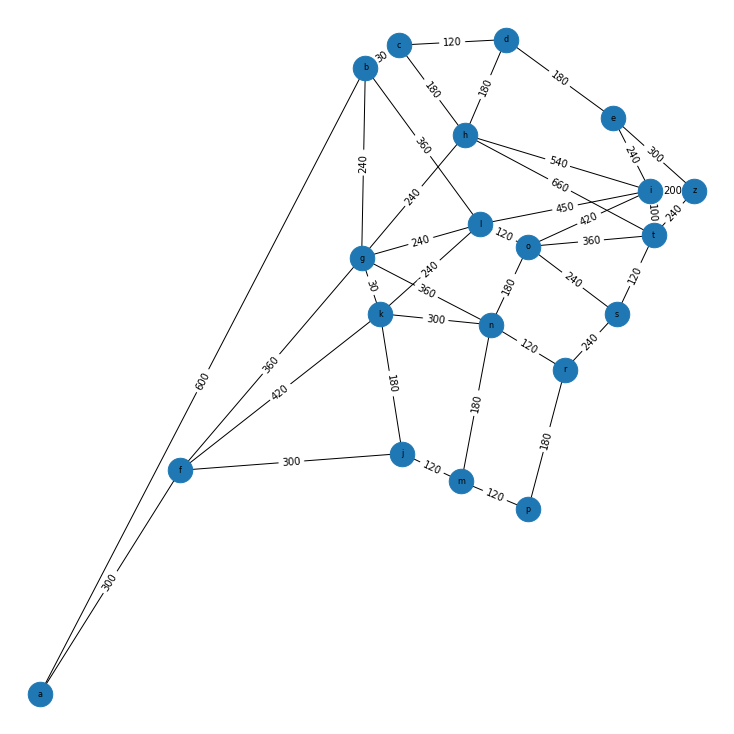

In [3]:
plt.figure(figsize=(10,10)) 
nx.draw(G, positions, with_labels=True, node_size=600, font_size=8)

edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, positions, edge_labels=edge_labels)
plt.show()

Dzięki metodzie shortest_path, która jest w bibliotece NetworkX chcę sprawdzić, która trasa będize najszybsza pomiędzy obżeżami miasta, a jego centrum w godzinach porannych. Dzięki uzyskaniu możliwie najkrótszej czasowo trasy będzie możliwośc np dłuższego snu.

In [4]:
# użycie metody shortest_path
nx.shortest_path(G, 'a', 'z', weight='weight')

['a', 'b', 'c', 'd', 'e', 'z']

Jak widać wynik obliczony jest taki sam jak ten pokazany przez mapy google i sugerowaną trasą jest jechanie S19, a następnie Alejami Solidarności, co jest zdecydowanie dłuższą trasą. Inne trasy w tej samej porze będą jedynie wydłużały podróż. 

# Podsumowanie

Dzięki językowi Python oraz teori grafów moge z łatwością rozwiązć problem wybrania najkrótszej trasy. Gdyby stworzyć graf, który posiadał by możliwie jaknajwięcej punktów i jaknajdokłaldniejsze dane dotyczące czasu można by bardzo dokłaldnie wybierać trasy poruszania się po mieście. Rozwiązanie tego konkretnego problemu udowadnia, że nie zawsze najkrótsza trasa jest najszybszą.

# Literatura

* [Shortest path](https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html)
* [Teoria grafów](https://pl.wikipedia.org/wiki/Teoria_grafów)
* [Algorytm Dijkstry](https://pl.wikipedia.org/wiki/Algorytm_Dijkstry)
* [Algorytm Bellmana-Forda](https://pl.wikipedia.org/wiki/Algorytm_Bellmana-Forda)